In [1]:
import pandas as pd 
data=pd.read_csv("green_tech_data.csv")
df=pd.DataFrame(data)


In [2]:
import matplotlib.pyplot as plt 

df.head()  

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [3]:
print(df.columns)

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')


In [4]:
df.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [10]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


c:\Users\jadit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jadit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jadit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jadit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

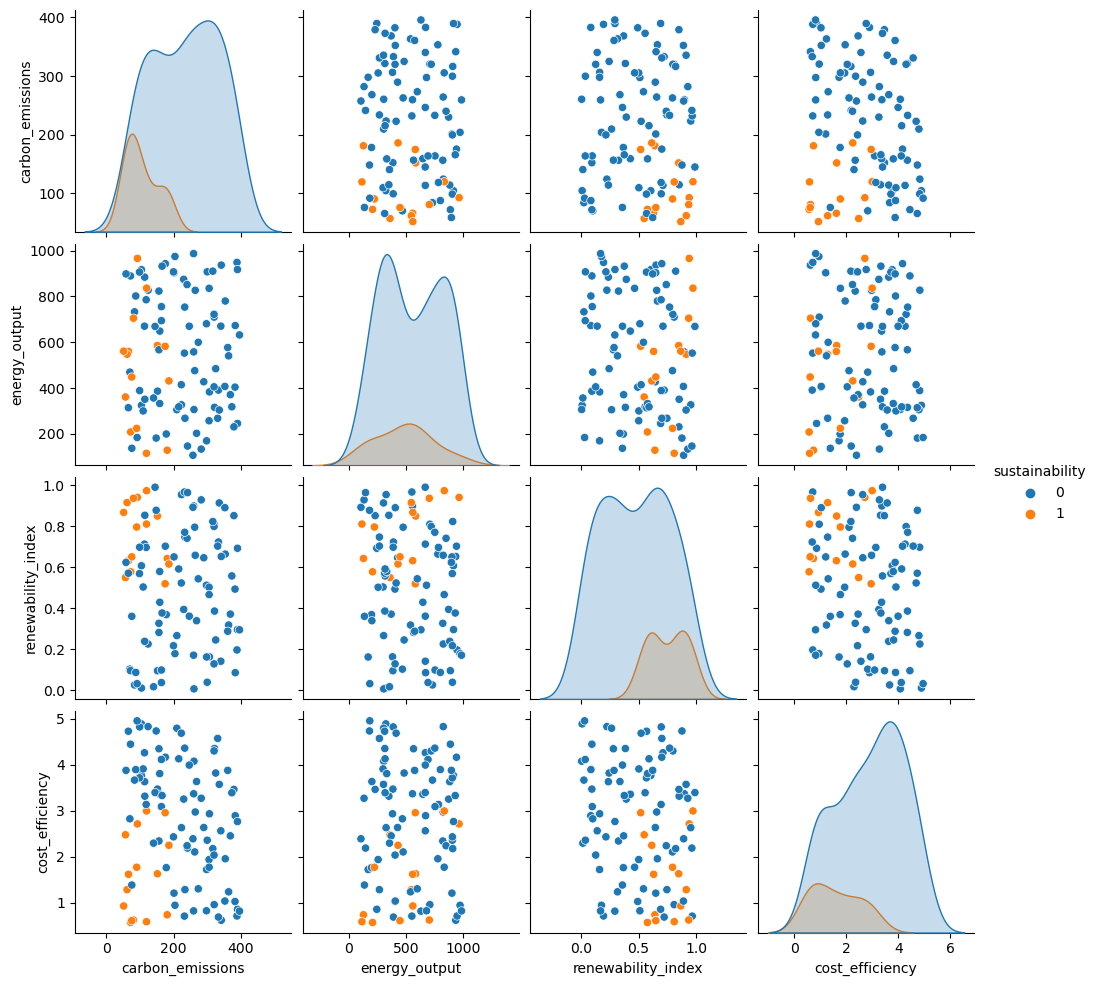

In [ ]:
import seaborn as sns 
temp=df
sns.pairplot(temp,hue='sustainability')
plt.show()

[[ 1.         -0.0340325  -0.03765408 -0.21188195 -0.44191214]
 [-0.0340325   1.         -0.14635362 -0.01178258 -0.10274916]
 [-0.03765408 -0.14635362  1.         -0.21481643  0.33619324]
 [-0.21188195 -0.01178258 -0.21481643  1.         -0.36131004]
 [-0.44191214 -0.10274916  0.33619324 -0.36131004  1.        ]]


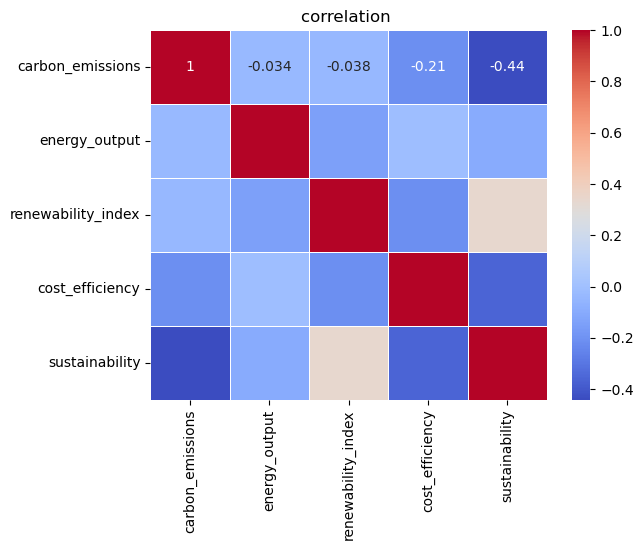

In [19]:

temp=df
correlation_matrix=temp.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)

plt.title('correlation ')
print(correlation_matrix.values)
plt.show()

In [20]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [39]:
X = df.drop(['sustainability','energy_output'], axis=1)
y=df["sustainability"]



In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [42]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc=accuracy_score(y_test,pred)
acc

0.95

[[33  0]
 [ 2  5]]


<Axes: >

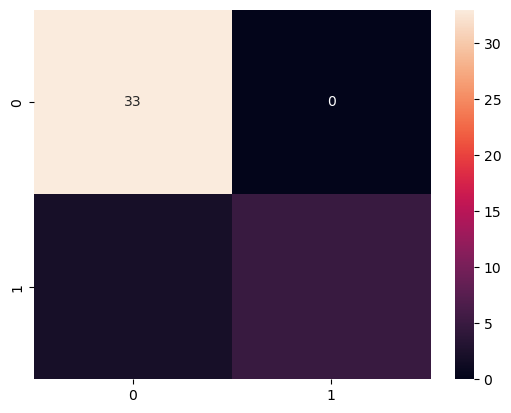

In [48]:
conf_matrix=confusion_matrix(y_test,pred)
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True)

In [49]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,pred,target_names=['Not sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [50]:
coeff=pd.DataFrame(lr.coef_.T,index=X.columns,columns=['Coefficient'])
print(coeff)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [51]:
import joblib 
joblib.dump(lr,'lr_model_sustainable.pkl')

['lr_model_sustainable.pkl']

In [56]:


# Load the trained model
loaded_model = joblib.load('lr_model_sustainable.pkl')

# Sample input with correct feature names
sample_input = pd.DataFrame({
    'carbon_emissions': [382.750007],
    'renewability_index': [0.084140],
    'cost_efficiency': [2.891096]
})

# Predict the output
predicted_output = loaded_model.predict(sample_input)

print("Predicted Output:", predicted_output[0])
print("Sustaianable") if predicted_output == 1 else print("Sus!")


Predicted Output: 0
Sus!
